# Estadística Bayesiana
    
      Marlijar Hurtado Moreno - Jhon Sebastián Vela Salcedo.

___

In [ ]:
# Importanto librerias
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import minimize_scalar as minimize
import random

import matplotlib.pyplot as plt

___

### I - Introducción a la Estadística Bayesiana

**Ejercicio**

1. Escriba un programa Python que imite el experimento ilustrado. Pero ahora suponga que la moneda es sesgada. Por ejemplo, suponga que $\mu=0.7$

In [ ]:
if __name__ == "__main__":
    numero_de_intentos = [0, 10, 50, 100, 200, 300]
    data = stats.bernoulli.rvs(0.7, size=numero_de_intentos[-1])
x = np.linspace(0, 1, 100)
for i, N in enumerate(numero_de_intentos):
        caras = data[:N].sum()
        
        ax = plt.subplot(len(numero_de_intentos) / 2, 2, i + 1)
        ax.set_title("%s intentos, %s caras" % (N, caras))
        
        plt.xlabel("$P(H)$, Probabilidad de cara")
        plt.ylabel("Densidad")
        if i == 0:
            plt.ylim([0.0, 2.0])
        plt.setp(ax.get_yticklabels(), visible=False)
        
        y = stats.beta.pdf(x, 1 + caras, 1 + N - caras)
        plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
        plt.fill_between(x, 0, y, color="#aaaadd", alpha=0.5)
        
plt.tight_layout()
plt.show()

2. $\leadsto$ Discuta estos resultados con sus compañeros

*En la medida en que la muestra aumenta, los datos van a tener menor varianza, por lo cual se van acercando a un valor fijo. En este caso es 0,7 porque la moneta está sesgada, y tiene una probabilidad a caer más caras que sellos.*

### Tarea
Narración de los datos
Para nuestra primera tarea usaremos un globo terraqueo a escala.

1. El experimento consiste en hacer girar el globo y pinchar en algun lugar sin tener ninguna preferencia. El experimento es de tipo dicotómico, debido a que solamente habra dos posibles resultados: agua (1) o tierra (0).

2. La probabilidad de pinchar en agua corresponde al valor verdadero de la proporción de agua y se denotará $\mu$.

3. La probabilidad de pinchar en tierra corresponde al valor verdadero de la proporción de tierra y es $ 1-\mu$.
4. Cada experimento es independiente de los demás.

5. Repita el proceso de actualización de la posterior en descrito en esta lección. Use Python y elabore algunos gráficos similares.

2


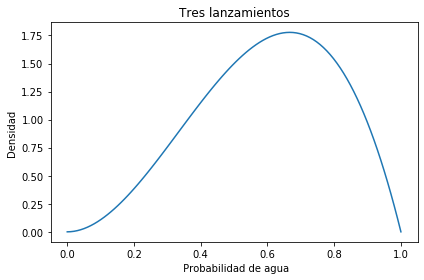

2


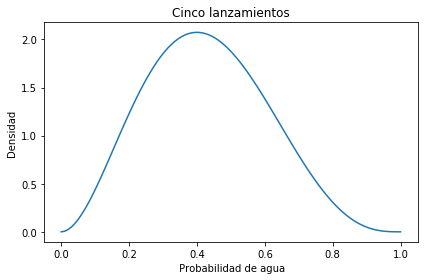

13


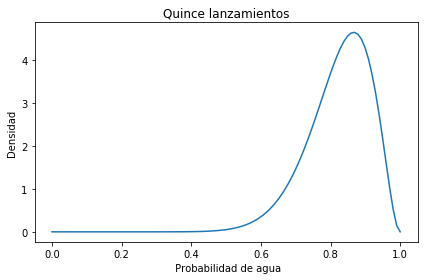

41


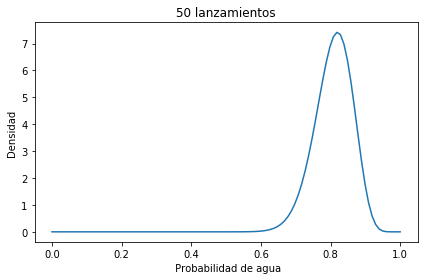

99


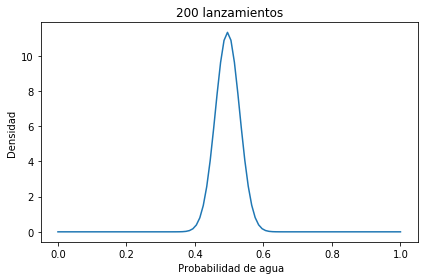

In [143]:
from scipy.stats import bernoulli

#3 pinchazos utilizando la probabilidad  de que agua sea 0.75
data=stats.bernoulli.rvs(p=0.75, size=3)
x = np.linspace(0, 1, 100)       
agua=data[:N].sum()
print(agua)
plt.xlabel(" Probabilidad de agua")
plt.ylabel("Densidad")
y=stats.beta.pdf(x, 1 + agua, 1 + 3 - agua)
plt.plot(x, y)
plt.title('Tres lanzamientos')
plt.tight_layout()
plt.show()
 
#5 pinchazos utilizando la probabilidad  de que agua sea 0.75
        
data=stats.bernoulli.rvs(p=0.75, size=5)
x = np.linspace(0, 1, 100)       
agua=data[:N].sum()
print(agua)
plt.xlabel(" Probabilidad de agua")
plt.ylabel("Densidad")
y=stats.beta.pdf(x, 1 + agua, 1 + 5 - agua)
plt.plot(x, y)
plt.title('Cinco lanzamientos')
plt.tight_layout()
plt.show()

#15 pinchazos  

data=stats.bernoulli.rvs(p=0.75, size=15)
x = np.linspace(0, 1, 100)       
agua=data[:N].sum()
print(agua)
plt.xlabel(" Probabilidad de agua")
plt.ylabel("Densidad")
y=stats.beta.pdf(x, 1 + agua, 1 + 15 - agua)
plt.plot(x, y)
plt.title('Quince lanzamientos')
plt.tight_layout()
plt.show()

#50 pinchazos 
data=stats.bernoulli.rvs(p=0.75, size=50)
x = np.linspace(0, 1, 100)       
agua=data[:N].sum()
print(agua)
plt.xlabel(" Probabilidad de agua")
plt.ylabel("Densidad")
y=stats.beta.pdf(x, 1 + agua, 1 + 50 - agua)
plt.plot(x, y)
plt.title('50 lanzamientos')
plt.tight_layout()
plt.show()


#200 pinchazos modificando la probabilidad según el resultado anterior 
data=stats.bernoulli.rvs(p=0.75, size=200)
x = np.linspace(0, 1, 100)       
agua=data[:N].sum()
print(agua)
plt.xlabel(" Probabilidad de agua")
plt.ylabel("Densidad")
y=stats.beta.pdf(x, 1 + agua, 1 + 200 - agua)
plt.plot(x, y)
plt.title('200 lanzamientos')
plt.tight_layout()
plt.show()




### II - La Estrategia Bayesiana

**Tarea**
Use geomaps y realice una estimación mas precisa para el problema de esta lección.

In [ ]:
# Prior - Beta
params = [0.5, 1, 2, 3]

x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True, figsize=(8, 7), constrained_layout=True)
for i in range(len(params)):
    for j in range(len(params)):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}".format(a,b), alpha=0)
        ax[i,j].legend()
ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, -0.05, 'θ', ha='center', fontsize=18)
f.text(-0.05, 0.5, 'p(θ)', va='center', rotation=90, fontsize=18)


# Likelihood - Binomial

n_params = [10, 20, 40] # veces que cayó agua
p_params = [0.25, 0.5, 0.75] # probabilidad del suceso

x = np.arange(0, max(n_params)+1)
f,ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True, figsize=(8, 7), constrained_layout=True)
for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]
        y = stats.binom(n=n, p=p).pmf(x)
        ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
        ax[i,j].set_ylim(0, 0.4)
        ax[i,j].plot(0, 0, label="N = {:3.2f}\nθ = {:3.2f}".format(n,p), alpha=0)
        ax[i,j].legend()

 # Posterior - (Likelihood*Prior)/(Marginal Likelihood)
plt.figure(figsize=(10, 8))

n_tiros = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (20, 20), (1, 4)]   #(Prior), (likelihood), (posterior)
dist = stats.beta
x = np.linspace(0, 1, 200)

for idx, N in enumerate(n_tiros):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)
    
    plt.axvline(theta_real, ymax=0.5, color='k')
    plt.plot(0, 0, label=f'{N:4d} tiros\n{y:4d} agua', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()

___

### IV - El efecto del tamaño de muestra

**Tarea**

Escriba el código para calcular la moda posterior en cada caso. Revise la lección Computación Bayesiana Básica, en el caso Binomial-Beta.

In [190]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.optimize import minimize_scalar as minimize
#utilizando los alpha y beta de la clase
alpha1=1.5
beta1=1.2
n1=6
w1=3
def f(n1,alpha1,beta1):
    return  -stats.beta(alpha1,beta1).pdf(n1)

lower = 1e-3
upper = 1  - 1e-3 
mode_f = minimize(f, bounds =(lower,upper),args=(w1+alpha1,n1-w1+beta1), method='bounded' )

mode_f

     fun: -2.2889702216912178
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 0.5223877133169147

In [192]:

#1.b.
n2=10
w2=6
def f(n2,alpha1,beta1):
    return  -stats.beta(alpha1,beta1).pdf(n2)

lower = 1e-3
upper = 1  - 1e-3 
mode_f = minimize(f, bounds =(lower,upper),args=(w2+alpha1,n2-w2+beta1), method='bounded' )

mode_f

     fun: -2.8505156362159867
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 0.607477735745656

In [193]:
#los del correo
#1.c 
n3=20
w3=15
def f(n3,alpha1,beta1):
    return  -stats.beta(alpha1,beta1).pdf(n3)

lower = 1e-3
upper = 1  - 1e-3 
mode_f = minimize(f, bounds =(lower,upper),args=(w3+alpha1,n3-w3+beta1), method='bounded' )

mode_f



     fun: -4.3117118956961145
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 0.7487923105165191

In [194]:

#1.d
n4=50
w4=38
def f(n4,alpha1,beta1):
    return  -stats.beta(alpha1,beta1).pdf(n4)

lower = 1e-3
upper = 1  - 1e-3 
mode_f = minimize(f, bounds =(lower,upper),args=(w4+alpha1,n4-w4+beta1), method='bounded' )

mode_f

     fun: -6.726703577424074
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: 0.7593683910530646

In [195]:

#1.e
n5=100
w5=78
def f(n5,alpha1,beta1):
    return  -stats.beta(alpha1,beta1).pdf(n5)

lower = 1e-3
upper = 1  - 1e-3 
mode_f = minimize(f, bounds =(lower,upper),args=(w5+alpha1,n5-w5+beta1), method='bounded' )

mode_f

     fun: -9.714102399164563
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: 0.7795428207456478

In [196]:

#1.f
n5=500
w5=362
def f(n5,alpha1,beta1):
    return  -stats.beta(alpha1,beta1).pdf(n5)

lower = 1e-3
upper = 1  - 1e-3 
mode_f = minimize(f, bounds =(lower,upper),args=(w5+alpha1,n5-w5+beta1), method='bounded' )

mode_f

     fun: -19.9961093873131
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 0.7239864265179499

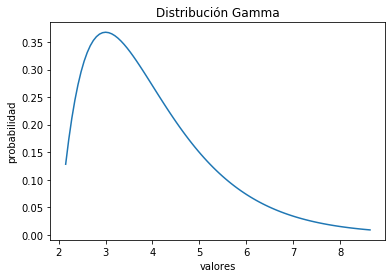

[2.96610324]
72
[85.43626749]


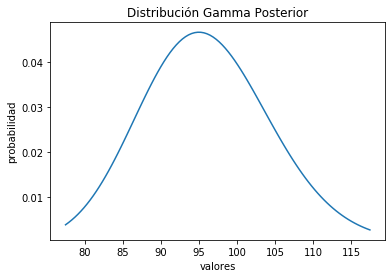

3.6
3.3636363636363638


In [234]:
# 2. MODELO POISSON-GAMMA
# Suponemos estos parámetros
#apriori
L = 5000
np.random.seed(L)

a=2
beta=0.5
v=1/beta
gamma = stats.gamma(a,v)
x = np.linspace(gamma.ppf(0.01),
                gamma.ppf(0.99), 100)
fp = gamma.pdf(x) 
plt.plot(x, fp)
plt.title('Distribución Gamma')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


lamda = stats.gamma(a,v).rvs(1)
print(lamda)
#posterior
n=20
y = np.array([3, 5, 3, 4,2, 4, 6, 2, 3, 5, 4, 2, 3, 3, 4, 3, 4, 4, 5, 3])
sumatoriay=sum(y)
print(sumatoriay)

apost=sumatoriay+a
vpost=n+v

lamdapost = stats.gamma(apost,vpost).rvs(1)
print(lamdapost)

gammapost = stats.gamma(apost,vpost)
x = np.linspace(gammapost.ppf(0.01),
                gammapost.ppf(0.99), 100)
fp = gammapost.pdf(x) 
plt.plot(x, fp)
plt.title('Distribución Gamma Posterior')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


mediay= y.mean()
EAP= ((n*mediay)/(n+v))+(((v/(n+v))*(a/v)))
print(EAP)


#El promedio de autos por minuto es de 3.36


In [235]:
3. #Los datos son la mediciones del diámetro de la cabeza de un tornillo en un proceso de producción. Se sabe que la desviación estándard de las observaciones es 1. 
#Haga la estimación Bayesiana del tamaño promedio del tornillo usando un modelo lineal Gaussiano.

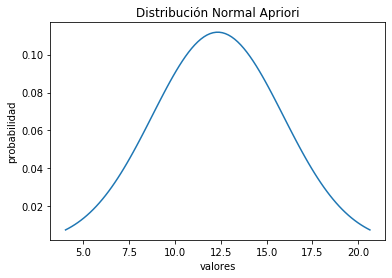

[10.04386215]
15.527396999999999
[15.31870759]


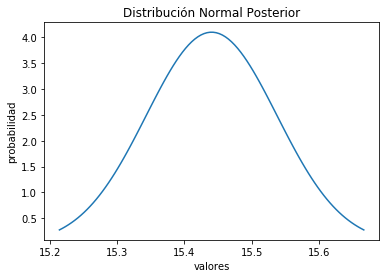

15.440475892827923


In [249]:
# 2. MODELO  Gaussiano-Gausisiano
# Suponemos estos parámetros
#apriori
L = 5000
np.random.seed(L)

mo=12.34
t2=3.567

normal = stats.norm(mo, t2)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x)
plt.plot(x, fp)
plt.title('Distribución Normal Apriori')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

theta= stats.norm(mo, t2).rvs(1)
print(theta)
#posterior
n=10
y = np.array([14.05143, 16.18481, 14.41038, 16.46475, 16.68658, 16.22363, 15.33024,13.87497, 16.10362, 15.94356])
mediay=y.mean()
print(mediay)

sigma2=1
m=((sigma2*mo)+(n*t2*mediay))/(sigma2+(n*t2))
s=(sigma2*t2)/(sigma2+(n*t2))

thetaposterior= stats.norm(m,s).rvs(1)
print(thetaposterior)

normalpost = stats.norm(m,s)
x = np.linspace(normalpost.ppf(0.01),
                normalpost.ppf(0.99), 100)
fp = normalpost.pdf(x) 
plt.plot(x, fp)
plt.title('Distribución Normal Posterior')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


k=(sigma2/(sigma2+(n*t2)))
EAP= (k*mo)+((1-k)*mediay)
print(EAP)


#El promedio de autos por minuto es de 3.36